In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np


%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 

In [ ]:
def faceDetection(test_img):
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')#Load haar classifier
    faces=face_haar_cascade.detectMultiScale(gray_img,scaleFactor=1.32,minNeighbors=5)#detectMultiScale returns rectangles

    return faces,gray_img

In [ ]:
#Given a directory below function returns part of gray_img which is face alongwith its label/ID
def labels_for_training_data(directory):
    faces=[]
    faceID=[]

    for path,subdirnames,filenames in os.walk(directory):
        for filename in filenames:
            if filename.startswith("."):
                print("Skipping system file")#Skipping files that startwith .
                continue

            id=os.path.basename(path)#fetching subdirectory names
            img_path=os.path.join(path,filename)#fetching image path
            print("img_path:",img_path)
            print("id:",id)
            test_img=cv2.imread(img_path)#loading each image one by one
            if test_img is None:
                print("Image not loaded properly")
                continue
            faces_rect,gray_img=faceDetection(test_img)#Calling faceDetection function to return faces detected in particular image
            if len(faces_rect)!=1:
               continue #Since we are assuming only single person images are being fed to classifier
            (x,y,w,h)=faces_rect[0]
            roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from grayscale image
            faces.append(roi_gray)
            faceID.append(int(id))
    return faces,faceID




In [ ]:
#Below function trains haar classifier and takes faces,faceID returned by previous function as its arguments
def train_classifier(faces,faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces,np.array(faceID))
    return face_recognizer

#Below function draws bounding boxes around detected face in image
def draw_rect(test_img,face):
    (x,y,w,h)=face
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=5)

#Below function writes name of person for detected label
def put_text(test_img,text,x,y):
    cv2.putText(test_img,text,(x,y),cv2.FONT_HERSHEY_DUPLEX,2,(255,0,0),4)

In [ ]:
count=0

for path, subdirnames, filenames in os.walk("/content/drive/MyDrive/trainingImages"):

    for filename in filenames:
      if filename.startswith("."):
        print("Skipping File:",filename)#Skipping files that startwith .
        continue
      img_path=os.path.join(path, filename)#fetching image path
      print("img_path",img_path)
      id=os.path.basename(path)#fetching subdirectory names
      img = cv2.imread(img_path)
      if img is None:
        print("Image not loaded properly")
        continue
      resized_image = cv2.resize(img, (100, 100))
      new_path="resizedTrainingImages"+"/"+str(id)
      print("desired path is",os.path.join(new_path, "frame%d.jpg" % count))#write all images to resizedTrainingImages/id directory
      cv2.imwrite(os.path.join(new_path, "frame%d.jpg" % count),resized_image)
      count += 1

Skipping File: .DS_Store
Skipping File: .DS_Store
img_path /content/drive/MyDrive/trainingImages/1/220px_Kangana_Ranaut_at_Fever_104_FM_Studios.jpg
desired path is resizedTrainingImages/1/frame0.jpg
img_path /content/drive/MyDrive/trainingImages/1/Inside_Kangana_Ranaut_Starrer_Manikarnikas_Wrap_Up_Party.jpg
desired path is resizedTrainingImages/1/frame1.jpg
img_path /content/drive/MyDrive/trainingImages/1/Kangana_Ranaut_rare_pictures.jpg
desired path is resizedTrainingImages/1/frame2.jpg
img_path /content/drive/MyDrive/trainingImages/1/58567_tksenxnhbd_1495192424.jpg
desired path is resizedTrainingImages/1/frame3.jpg
img_path /content/drive/MyDrive/trainingImages/1/435069_kangana.jpg
desired path is resizedTrainingImages/1/frame4.jpg
img_path /content/drive/MyDrive/trainingImages/1/Kan.jpg
desired path is resizedTrainingImages/1/frame5.jpg
img_path /content/drive/MyDrive/trainingImages/1/Kangana.jpg
desired path is resizedTrainingImages/1/frame6.jpg
img_path /content/drive/MyDrive/trai

In [ ]:
#This module takes images  stored in diskand performs face recognition
test_img=cv2.imread('/content/drive/MyDrive/TestImages/1.jfif')#test_img path
faces_detected,gray_img=faceDetection(test_img)
print("faces_detected:",faces_detected)




faces_detected: [[64 49 95 95]]


In [ ]:
test_img2=cv2.imread('/content/drive/MyDrive/TestImages/Kangana.jpg')#test_img path
faces_detected,gray_img=faceDetection(test_img2)
print("faces_detected:",faces_detected)

faces_detected: [[482  78 186 186]]


In [ ]:
#Comment belows lines when running this program second time.Since it saves training.yml file in directory
faces,faceID=labels_for_training_data('/content/drive/MyDrive/trainingImages')
face_recognizer=train_classifier(faces,faceID)
face_recognizer.write('trainingData.yml')


#Uncomment below line for subsequent runs
# face_recognizer=cv2.face.LBPHFaceRecognizer_create()
# face_recognizer.read('trainingData.yml')#use this to load training data for subsequent runs



Skipping system file
Skipping system file
img_path: /content/drive/MyDrive/trainingImages/1/220px_Kangana_Ranaut_at_Fever_104_FM_Studios.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Inside_Kangana_Ranaut_Starrer_Manikarnikas_Wrap_Up_Party.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Kangana_Ranaut_rare_pictures.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/58567_tksenxnhbd_1495192424.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/435069_kangana.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Kan.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Kangana.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Blue_Kangana_d.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Kangna_Ranaut_1900x.jpg
id: 1
img_path: /content/drive/MyDrive/trainingImages/1/Kangana_Ranaut.gif
id: 1
Image not loaded properly
img_path: /content/drive/MyDrive/trainingImages/1/Kangana_Ranaut1_2.jpg
id: 1
img_path: /content

confidence: 0.0
label: 0


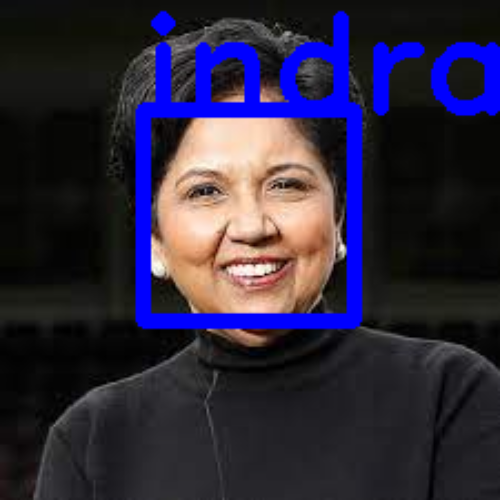

In [ ]:
name={0:"indra",1:"Kangana"}#creating dictionary containing names for each label

for face in faces_detected:
    (x,y,w,h)=face
    roi_gray=gray_img[y:y+h,x:x+h]
    label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
    print("confidence:",confidence)
    print("label:",label)
    draw_rect(test_img,face)
    predicted_name=name[label]
    if(confidence>37):#If confidence more than 37 then don't print predicted face text on screen
        continue
    put_text(test_img,predicted_name,x,y)

resized_img=cv2.resize(test_img,(500,500))
from google.colab.patches import cv2_imshow
cv2_imshow(resized_img)


confidence: 0.0
label: 1


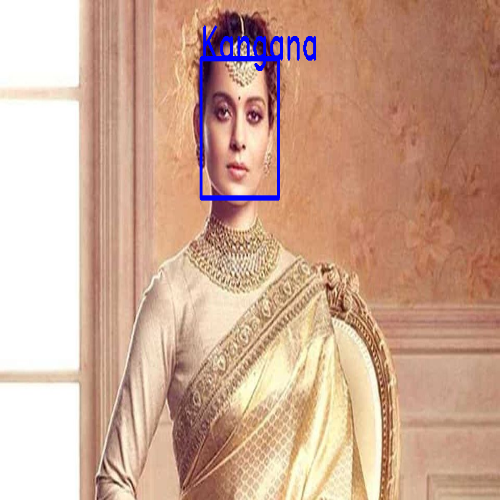

In [ ]:
name={0:"indra",1:"Kangana"}#creating dictionary containing names for each label

for face in faces_detected:
    (x,y,w,h)=face
    roi_gray=gray_img[y:y+h,x:x+h]
    label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
    print("confidence:",confidence)
    print("label:",label)
    draw_rect(test_img2,face)
    predicted_name=name[label]
    if(confidence>37):#If confidence more than 37 then don't print predicted face text on screen
        continue
    put_text(test_img2,predicted_name,x,y)

resized_img=cv2.resize(test_img2,(500,500))
from google.colab.patches import cv2_imshow
cv2_imshow(resized_img)